# Spotify data analysis

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
from ast import literal_eval
from  itertools import chain
from collections import Counter
pd.options.mode.chained_assignment = None

In [2]:
# Load data
songs_spotify = pd.read_csv('spotify_data.csv', converters = {'Spotify Genre': literal_eval})

In [3]:
# Drop duplicated records with the same JSON file name
songs_spotify = songs_spotify.drop_duplicates(subset = 'JSON file', keep = 'first')
display(songs_spotify)

,Position,Artist,Song Title,Year,JSON file,Split Names,Spotify ID,Spotify Artist,Spotify Song Title,Spotify Genre,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,2,Nat King Cole,Mona Lisa,1950,1.json,Nat King Cole,5dae01pKNjRQtgOeAkFzPY,Nat King Cole,Mona Lisa,"[adult standards, lounge, vocal jazz]",...,0.1130,-12.201,1.0,0.0371,174.578,3.0,https://api.spotify.com/v1/tracks/5dae01pKNjRQ...,audio_features,spotify:track:5dae01pKNjRQtgOeAkFzPY,0.303
1,3,Anton Karas,Third Man Theme,1950,2.json,Anton Karas,1jWbae7ESwl2fWHGwcLvLk,Anton Karas,The Third Man Theme ( Studio Version),"[classic soundtrack, zither]",...,0.0645,-8.929,1.0,0.0413,87.948,4.0,https://api.spotify.com/v1/tracks/1jWbae7ESwl2...,audio_features,spotify:track:1jWbae7ESwl2fWHGwcLvLk,0.835
2,5,Gary and Bing Crosby,Simple Melody,1950,4.json,Gary,33FdwvfiSBRbE2AQ4UehaR,Bing Crosby,Play A Simple Melody - Single Version,"[adult standards, easy listening, lounge]",...,0.1670,-13.755,1.0,0.0473,138.800,3.0,https://api.spotify.com/v1/tracks/33FdwvfiSBRb...,audio_features,spotify:track:33FdwvfiSBRbE2AQ4UehaR,0.829
3,6,Teresa Brewer,"Music, Music, Music",1950,5.json,Teresa Brewer,0lO5EKoz1Rb1pJoPoldE4D,Teresa Brewer,(Put Another Nickel In) Music! Music! Music!,"[adult standards, brill building pop, deep adu...",...,0.1540,-14.392,1.0,0.0398,99.136,4.0,https://api.spotify.com/v1/tracks/0lO5EKoz1Rb1...,audio_features,spotify:track:0lO5EKoz1Rb1pJoPoldE4D,0.919
4,7,Guy Lombardo,Third Man Theme,1950,6.json,Guy Lombardo,6kVfwQOc2PjVPwbk0aEmN9,Guy Lombardo,Third Man Theme,"[adult standards, big band, easy listening, lo...",...,0.0849,-10.808,1.0,0.0358,115.590,4.0,https://api.spotify.com/v1/tracks/6kVfwQOc2PjV...,audio_features,spotify:track:6kVfwQOc2PjVPwbk0aEmN9,0.536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,96,Lainey Wilson,Things A Man Oughta Know,2021,6775.json,Lainey Wilson,5QS8PNEWbqTEZyQ6e9ZbJf,Lainey Wilson,Things A Man Oughta Know,"[contemporary country, country pop]",...,0.1330,-5.623,1.0,0.0312,139.931,4.0,https://api.spotify.com/v1/tracks/5QS8PNEWbqTE...,audio_features,spotify:track:5QS8PNEWbqTEZyQ6e9ZbJf,0.397
4495,97,BRS Kash,Throat Baby (Go Baby),2021,6776.json,BRS Kash,15C4TnrrVdym7UykxQIOTZ,BRS Kash,Throat Baby (Go Baby) (with DaBaby & City Girl...,[],...,0.1670,-8.420,0.0,0.3240,131.988,4.0,https://api.spotify.com/v1/tracks/15C4TnrrVdym...,audio_features,spotify:track:15C4TnrrVdym7UykxQIOTZ,0.397
4496,98,Rod Wave,Tombstone,2021,6777.json,Rod Wave,3zc8VZEpM1onYV4FWGdFvm,Rod Wave,Tombstone,[florida rap],...,0.1290,-5.212,1.0,0.1630,84.448,4.0,https://api.spotify.com/v1/tracks/3zc8VZEpM1on...,audio_features,spotify:track:3zc8VZEpM1onYV4FWGdFvm,0.535
4497,99,Chase Rice Featuring Florida Georgia Line,Drinkin' Beer. Talkin' God. Amen.,2021,6778.json,Chase Rice,1UYfAU2bwgjaM5rIIPQleC,Chase Rice,Drinkin' Beer. Talkin' God. Amen. (feat. Flori...,"[contemporary country, country, country road, ...",...,0.3740,-4.691,1.0,0.0294,100.032,4.0,https://api.spotify.com/v1/tracks/1UYfAU2bwgja...,audio_features,spotify:track:1UYfAU2bwgjaM5rIIPQleC,0.724


Text(0.5, 1.0, "Count received songs' lyrics per year")

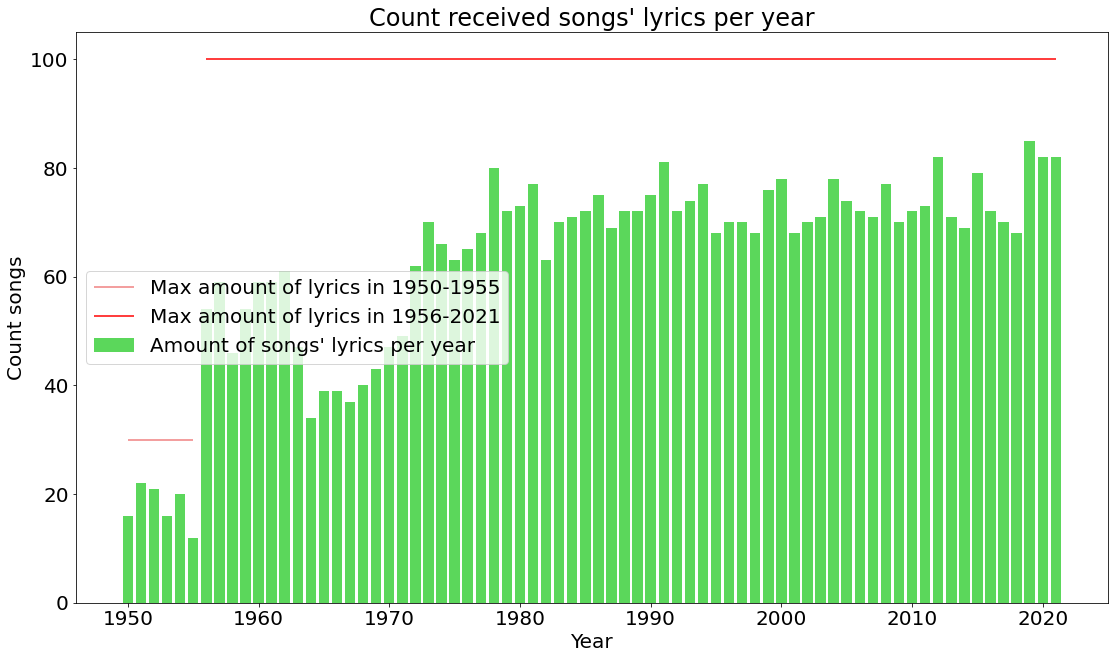

In [4]:
# Count received songs' lyrics per year
grouped_by_year = songs_spotify.groupby('Year').size()
plt.figure(figsize = (18.5, 10.5))
plt.bar(grouped_by_year.index, grouped_by_year, color = 'limegreen', alpha = 0.8)
plt.hlines(y = 30, xmin = 1950, xmax = 1955, colors = 'lightcoral')
plt.hlines(y = 100, xmin = 1956, xmax = 2021, colors='r')
plt.ylabel('Count songs')
plt.xlabel('Year')
plt.legend(['Max amount of lyrics in 1950-1955', 'Max amount of lyrics in 1956-2021', 'Amount of songs\' lyrics per year'], loc = 6)
plt.title('Count received songs\' lyrics per year')
#plt.savefig('pobrane_piosenki_spotify.pdf')

In [5]:
# Count genres
genres = pd.Series(list(chain.from_iterable(songs_spotify['Spotify Genre'])))
genres_count_df = pd.DataFrame(genres.value_counts()).reset_index()
genres_count_df = genres_count_df.rename(columns = {'index': 'Genre', 0: 'Count genre'})
genres_count_df.head(10)

,Genre,Count genre
0,dance pop,952
1,pop,902
2,soft rock,835
3,mellow gold,800
4,adult standards,726
5,urban contemporary,606
6,rock,536
7,brill building pop,471
8,classic rock,458
9,r&b,457


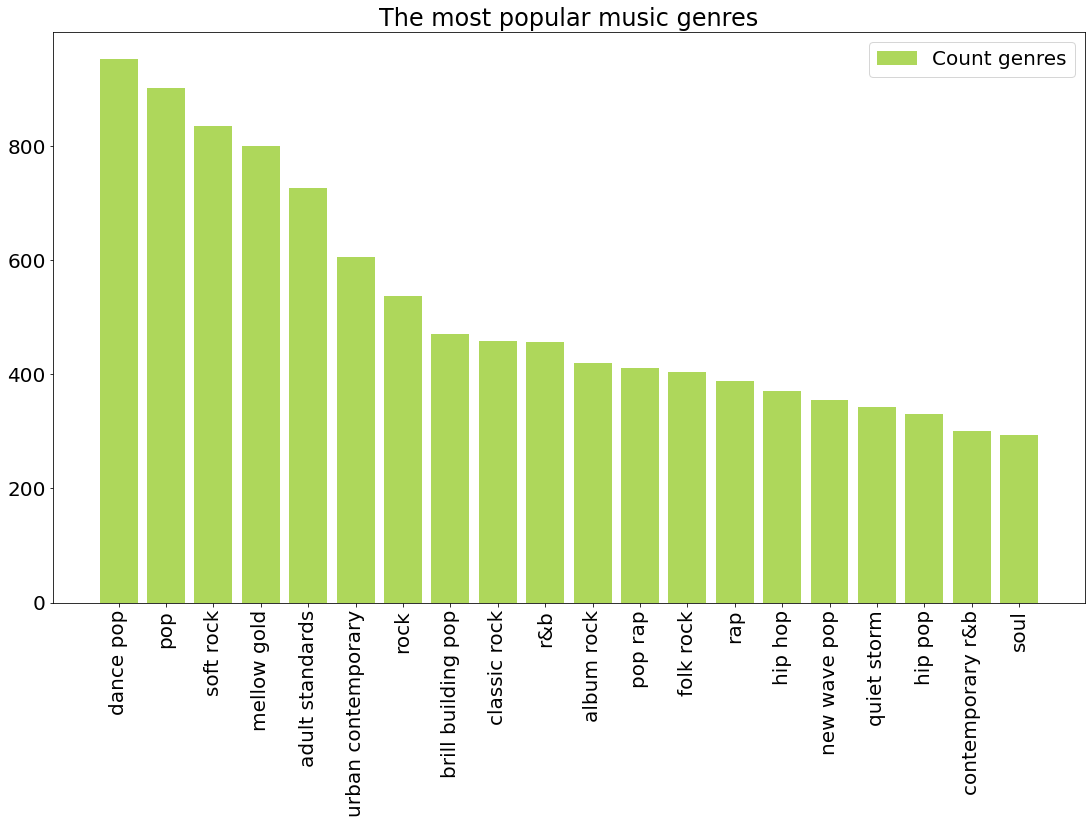

In [6]:
# Plot 20 first music genres
plt.figure(figsize = (18.5, 10.5))
plt.bar(genres_count_df['Genre'].head(20), genres_count_df['Count genre'].head(20), color = 'yellowgreen', alpha = 0.8)
plt.xticks(rotation=90)
plt.legend(['Count genres'], loc = 1)
plt.title('The most popular music genres')
plt.savefig('najpopularniejsze_gatunki.pdf')

In [7]:
# Analyze rap genre
rap = songs_spotify[['Year', 'Spotify Genre']]

# Filter rap genre function
def filter_rap(genre_list):
    if any('rap' in s for s in genre_list):
        return True
    else:
        return False
rap['Is rap'] = [filter_rap(i) for i in rap['Spotify Genre']]
display(rap)

,Year,Spotify Genre,Is rap
0,1950,"[adult standards, lounge, vocal jazz]",False
1,1950,"[classic soundtrack, zither]",False
2,1950,"[adult standards, easy listening, lounge]",False
3,1950,"[adult standards, brill building pop, deep adu...",False
4,1950,"[adult standards, big band, easy listening, lo...",False
...,...,...,...
4494,2021,"[contemporary country, country pop]",False
4495,2021,[],False
4496,2021,[florida rap],True
4497,2021,"[contemporary country, country, country road, ...",False


In [8]:
# Percentage of rap artists
rap_grouped =  pd.DataFrame(rap.groupby('Year')['Is rap'].sum())
rap_grouped['All artists'] = rap['Year'].value_counts()
rap_grouped['Percentage of rap artists'] = rap_grouped['Is rap'] / rap_grouped['All artists'] * 100
rap_grouped

,Is rap,All artists,Percentage of rap artists
Year,,,
1950,0,16,0.000000
1951,0,22,0.000000
1952,0,21,0.000000
1953,0,16,0.000000
1954,0,20,0.000000
...,...,...,...
2017,28,70,40.000000
2018,33,68,48.529412
2019,35,85,41.176471


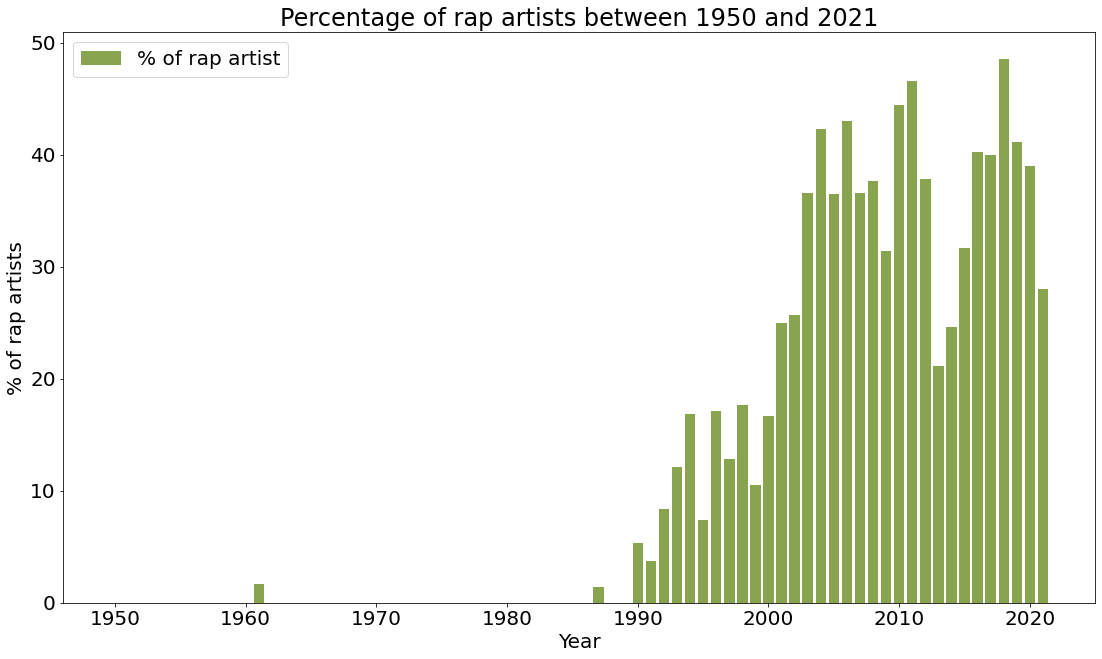

In [9]:
plt.figure(figsize = (18.5, 10.5))
plt.bar(rap_grouped.index, rap_grouped['Percentage of rap artists'], color = 'olivedrab', alpha = 0.8)
plt.legend(['% of rap artist'], loc = 2)
plt.title('Percentage of rap artists between 1950 and 2021')
plt.xlabel('Year')
plt.ylabel('% of rap artists')
plt.savefig('artysci_rap.pdf')

In [10]:
# Grouped mean values for audio features
columns_audio_features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence']
grouped_audio_features = songs_spotify.groupby('Year')[columns_audio_features].mean()
grouped_audio_features.style.background_gradient(cmap = 'Greens')

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
Year,,,,,,,,,,,
1950,0.866438,0.535750,175668.312500,0.263900,0.164229,0.179400,-13.708250,0.039913,116.357125,3.750000,0.546812
1951,0.848500,0.434500,172208.636364,0.333823,0.046500,0.187886,-11.396773,0.040482,123.729455,3.954545,0.501045
1952,0.880000,0.498048,163951.000000,0.210467,0.076958,0.214805,-14.095190,0.043314,115.124524,3.714286,0.454000
1953,0.813437,0.473750,170112.062500,0.227775,0.059989,0.146556,-11.930125,0.099656,99.564563,3.875000,0.409375
1954,0.825700,0.423400,179586.000000,0.256025,0.000072,0.212535,-12.409800,0.044125,91.178450,3.700000,0.434950
1955,0.769417,0.546333,162700.750000,0.382042,0.053749,0.137783,-12.899167,0.083950,119.504583,3.833333,0.574750
1956,0.777981,0.488352,154822.814815,0.363526,0.028630,0.196191,-12.073667,0.058217,115.102981,3.703704,0.595315
1957,0.741146,0.547695,150078.661017,0.456219,0.013496,0.195283,-10.517169,0.057280,117.302661,3.847458,0.660475
1958,0.668043,0.555109,147191.717391,0.469476,0.087606,0.190496,-10.971348,0.051241,121.876304,3.826087,0.688304


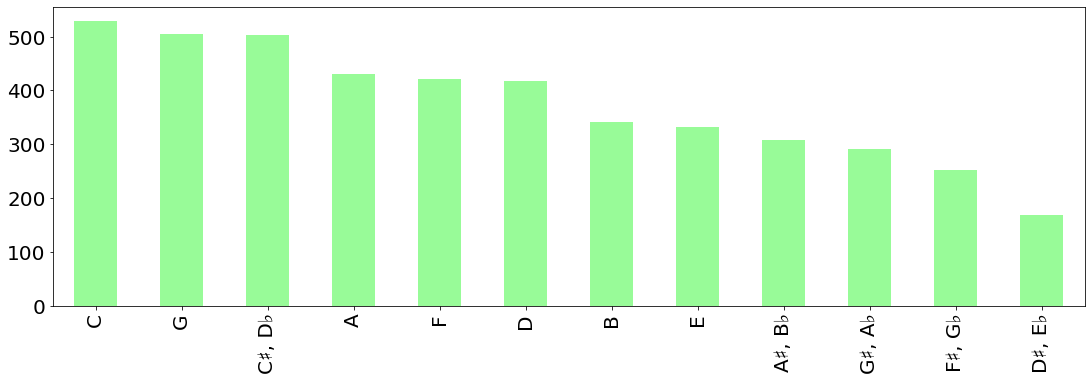

In [11]:
# Histograms for categorical data
keys = {0.0: 'C', 1.0: 'C♯, D♭', 2.0: 'D', 3.0: 'D♯, E♭', 4.0: 'E', 5.0: 'F', 6.0: 'F♯, G♭', 7.0: 'G', 8.0: 'G♯, A♭', 9.0: 'A', 10.0: 'A♯, B♭', 11.0: 'B'}
songs_spotify['key'] = songs_spotify['key'].map(keys)
songs_spotify['key'].value_counts().plot.bar(figsize = (18.5, 5.5), color = 'palegreen')
plt.savefig('tonacje.pdf')

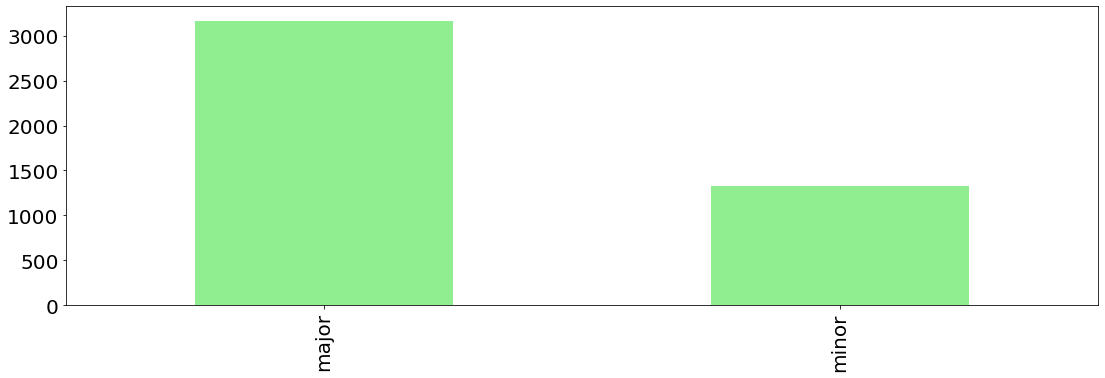

In [12]:
modes = {0.0: 'minor',1.0: 'major'}
songs_spotify['mode'] = songs_spotify['mode'].map(modes)
songs_spotify['mode'].value_counts().plot.bar(figsize = (18.5, 5.5), rot = 90, color = 'lightgreen')
plt.savefig('durmoll.pdf')